In [1]:
% matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Remember to enter in the cell twice for this to work

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Dropping duplicate values that occur before combining
city_data = city_data.drop_duplicates('city')

# Combine the data into a single dataset
pyber_data_analysis = pd.merge(ride_data, city_data, how='left',on=['city','city'])

# Display the data table for preview
pyber_data_analysis.head(3)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban


In [2]:
# Finding totals to use in the percentages below 
# Total Pyber rides taken in dataset
pyber_rides_total = len(pyber_data_analysis)
# Sum of all Pyber fares
pyber_fares_total = round(sum(pyber_data_analysis['fare']),2)
# Sum of all Pyber drivers
pyber_drivers_total = round(sum(pyber_data_analysis['driver_count']),2)

# Making a groupby type from the dataframe and previewing it

pyber_calc = pyber_data_analysis.groupby(['type'])
pyber_calc.head(1)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural


In [3]:
# Making various dataframes, groupbys, and operations for bubble plot below:

# Making specific dataframes based on urban, suburban, and rural city types
pyber_urban = pyber_data_analysis.loc[(pyber_data_analysis['type']) == 'Urban']
pyber_suburban = pyber_data_analysis.loc[(pyber_data_analysis['type']) == 'Suburban']
pyber_rural = pyber_data_analysis.loc[(pyber_data_analysis['type']) == 'Rural']

# Urban city type calculations of average fare, total rides, and total drivers
urban_avg_fare = pyber_urban.groupby(['city'])['fare'].mean()
urban_total_rides = pyber_urban.groupby(['city']).count()['ride_id']
urban_total_drivers = pyber_urban.groupby(['city'])['driver_count'].value_counts()

# Suburban city type calculations of average fare, total rides, and total drivers
suburban_avg_fare = pyber_suburban.groupby(['city'])['fare'].mean()
suburban_total_rides = pyber_suburban.groupby(['city']).count()['ride_id']
suburban_total_drivers = pyber_suburban.groupby(['city'])['driver_count'].value_counts()

# Rural city type calculations of average fare, total rides, and total drivers
rural_avg_fare = pyber_rural.groupby(['city'])['fare'].mean()
rural_total_rides = pyber_rural.groupby(['city']).count()['ride_id']
rural_total_drivers = pyber_rural.groupby(['city'])['driver_count'].value_counts()

In [4]:
# Making various groupbys and operations for pie charts below:

# Fare sums per city => for the Total Fares by City Type pie chart
pyber_fare_sum = (pyber_calc.sum()[('fare')])

# Percentage check for pie charts later (checks out)
# pyber_fare_sum_percentage = ((pyber_fare_sum / pyber_fares_total)*100)

# Making  the city column as a list to preserve the order
pyber_city_types = pyber_fare_sum.index.values.tolist()

# Number of rides per city type => for Total Rides by City Type pie chart
pyber_rides = (pyber_calc.count()[('fare')])

# Percentage check for pie charts later (checks out)
pyber_rides_percentage = ((pyber_rides / pyber_rides_total)*100)

# Number of drivers per city type => for Total Riders by City Type pie chart
pyber_drivers = (pyber_calc.sum()[('driver_count')])

# Percentage check for pie charts later (checks out)
pyber_drivers_percentage = ((pyber_drivers / pyber_drivers_total)*100)

## Bubble Plot of Ride Sharing Data

Text(0.5,1,'PyberX Ride Share Data')

Text(0.5,0,'Total Number of Rides Per City')

Text(0,0.5,'Average Fare ($)')

Text(1,0.5,'Note: Circle size represents driver count per city')

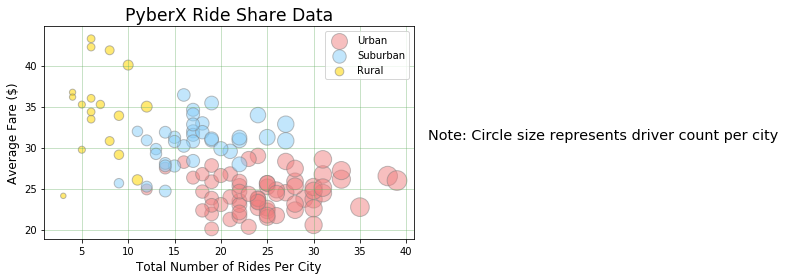

In [5]:
# Building scatter plots for each city type 

# Urban scatter plot
plt.scatter(urban_total_rides, urban_avg_fare, s=(urban_total_drivers*10),
            marker ='o', facecolors ="lightcoral", edgecolors='grey',alpha = 0.5, label="Urban")

# Suburban scatter plot
plt.scatter(suburban_total_rides, suburban_avg_fare, s=(suburban_total_drivers*10),
            marker ='o', facecolors ="lightskyblue", edgecolors='grey',alpha = 0.5, label="Suburban")

# Rural scatter plot
plt.scatter(rural_total_rides, rural_avg_fare, s=(rural_total_drivers*10),
            marker ='o', facecolors ="gold", edgecolors='grey',alpha = 0.55, label="Rural")

# Chart properties
plt.title("PyberX Ride Share Data", size='xx-large')
plt.xlabel("Total Number of Rides Per City", size='large')
plt.ylabel("Average Fare ($)", size='large')
plt.legend(loc='upper right')
plt.figtext(1, 0.5, "Note: Circle size represents driver count per city", size='x-large')
plt.tight_layout()
plt.grid(alpha = 0.45, color = '#69af64')
plt.savefig("output/pyberx_bubble_plot.png")
plt.show()

## Total Fares by City Type

([<matplotlib.patches.Wedge at 0x254dc5f6c18>,
 [Text(-0.526746,1.02227,'Rural'),
  Text(-1.15665,-0.0881128,'Suburban'),
  Text(1.13907,-0.158148,'Urban')],
 [Text(-0.297726,0.577806,'6.8%'),
  Text(-0.658093,-0.0501331,'30.5%'),
  Text(0.643824,-0.0893878,'62.7%')])

Text(0.5,1,'Total Fares by City Type')

(-1.1757027892280782,
 1.1693115827269718,
 -1.1144803285755944,
 1.1115558761520308)

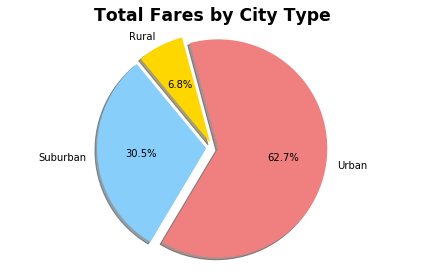

In [6]:
# Labels for the sections of our pie chart
labels = pyber_city_types
# The values of each section of the pie chart
fares = pyber_fare_sum
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
# Tells matplotlib to seperate the "Python" section from the others
explode = (0.05, 0.06, 0.05)

# Creating the pie chart based upon the values above
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=105)
plt.title("Total Fares by City Type", size='xx-large', weight='bold')
plt.axis("equal")
plt.tight_layout()
plt.savefig("output/pyberx_city_fares.png")
plt.show()

## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x254dc64a048>,
 [Text(0.668238,0.935926,'Rural'),
  Text(-0.421669,1.08065,'Suburban'),
  Text(0.235998,-1.12552,'Urban')],
 [Text(0.3777,0.529002,'5.3%'),
  Text(-0.239915,0.61485,'26.3%'),
  Text(0.13339,-0.636166,'68.4%')])

Text(0.5,1,'Total Rides by City Type')

(-1.1072427268722036,
 1.1253794788258027,
 -1.170901133263142,
 1.1670249132134798)

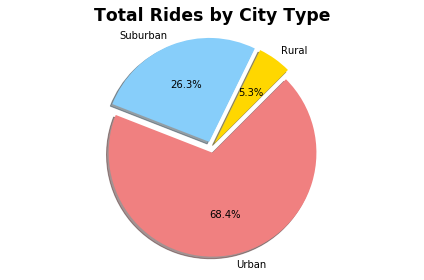

In [7]:
# Labels for the sections of our pie chart
labels = pyber_city_types
# The values of each section of the pie chart
rides = pyber_rides
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
# Tells matplotlib to seperate the "Python" section from the others
explode = (0.05, 0.06, 0.05)

# Creating the pie chart based upon the values above
plt.pie(rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
plt.title("Total Rides by City Type", size='xx-large', weight='bold')
plt.axis("equal")
plt.tight_layout()
plt.savefig("output/pyberx_city_rides.png")
plt.show()

## Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x254dc6921d0>,
 [Text(0.706282,-0.95774,'Rural'),
  Text(1.01594,-0.580311,'Suburban'),
  Text(-1.02707,0.620593,'Urban')],
 [Text(0.409525,-0.555328,'0.8%'),
  Text(0.581779,-0.332315,'12.5%'),
  Text(-0.599122,0.362013,'86.7%')])

Text(0.5,1,'Total Drivers by City Type')

(-1.198968415974445,
 1.1599357450604937,
 -1.0541209489890977,
 1.1526134757765052)

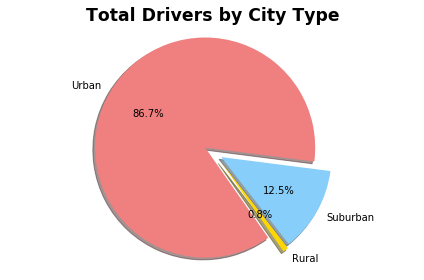

In [8]:
# Labels for the sections of our pie chart
labels = pyber_city_types
# The values of each section of the pie chart
drivers = pyber_drivers
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
# Tells matplotlib to seperate the "Python" section from the others
explode = (0.09, 0.07, 0.1)

# Creating the pie chart based upon the values above
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=305)
plt.title("Total Drivers by City Type", size='xx-large', weight='bold')
plt.axis("equal")
plt.tight_layout()
plt.savefig("output/pyberx_city_drivers.png")
plt.show()

Three observable trends based on data:
- Overall, there are vastly more drivers and rides in urban areas, compared to suburban and rural areas.
- The data is skewed towards the urban drivers, which inflates the incidence of the lower fare averages for urban rides. Conversely, rural and suburban have higher fare averages for rides, but this is largely due in part of the comparatively low number of rides taken in the timeframe of this dataset. 
- It appears that in urban cities where there are 20-25 drivers, the average fare per ride is also $20-25.

See output directory below for image exports: 
https://github.com/Emanste92/UCBEx_DataAnalytics/tree/master/Pyber/output